# Assignment
In this project you must create a web service that uses machine learning to make pre-dictions based on the data setpowerproductionavailable on Moodle.  
The goal is toproduce a model that accurately predicts wind turbinepoweroutput from windspeedvalues, 
as in the data set.  You must then develop a web service that will respond withpredicted power values 
based on speed values sent as HTTP requests.  Your submissionmust be in the form of a git repository containing,
at a minimum, the following items
    
1.  Jupyter  notebook  that  trains  a  model  using  the  data  set.   In  the  notebook  youshould explain your model and give an analysis of its accuracy.
2.  Python script that runs a web service based on the model, as above.
3.  Dockerfile to build and run the web service in a container.
4.  Standard items in a git repository such as a README.

To enhance your submission, you might consider developing and comparing more thanone model.  Rest assured, all the above concepts will be explored in lecture videos andother materials in the coming semester


# Power production
The powerproduction dataset contains speed(x) and power values(y) . The data set contains 500 cases so a scatter 
plot will be used to represent the data in a visual manner.

In [1]:
# Imports
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import seaborn as sb
import matplotlib.pyplot as plt


In [2]:
# Seabord plots
sb.set()

# Find and read the powerproduction dataframe
data = pd.read_csv('powerproduction.csv')
df = pd.DataFrame(data)
df


,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


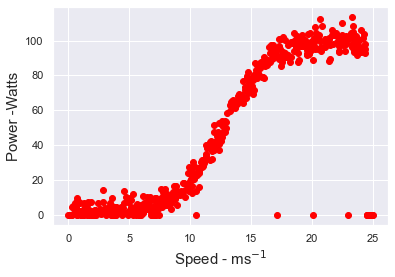

In [3]:
# X and y values for regression
X = data.iloc[:, 0].values
y = data.iloc[:, 1].values

def scatterPlot(X, y):# Scatter plot
    plt.scatter(X, y, color="red");
    plt.xlabel("Speed - ms$^{-1}$", fontsize=15)
    plt.ylabel("Power -Watts", fontsize=15)  
scatterPlot(X, y)

In [4]:
print(data.describe())

            speed       power
count  500.000000  500.000000
mean    12.590398   48.014584
std      7.224991   41.614572
min      0.000000    0.000000
25%      6.324750    5.288000
50%     12.550500   41.645500
75%     18.775250   93.537000
max     25.000000  113.556000


The scatter plots shows a few outliers present in the dataset. These outliers are probably a computer malfunction or mechanical issue with the windmill.
To avoid these points from skewing our data and decreaseing it's accuracy they will be removed. While these means the 
data set is slightly smaller it gives us a more accurate set to work with.

In [5]:
# Locate data points where speed is > 10 and power is = 0
data.loc[(data['power'] == 0 ) & (data['speed'] > 10)]

,speed,power
208,10.511,0.0
340,17.167,0.0
404,20.095,0.0
456,22.998,0.0
490,24.499,0.0
491,24.525,0.0
492,24.575,0.0
493,24.650,0.0
494,24.750,0.0
495,24.775,0.0


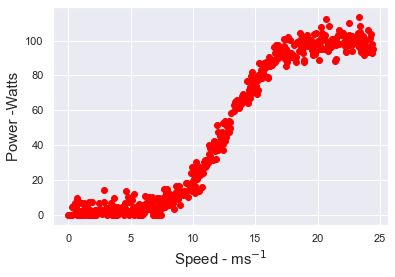

In [6]:
# New more accurate dataset to work with
data = data.drop([208, 340, 404, 456, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499]);
X = data.iloc[:, 0].values
y = data.iloc[:, 1].values
X = X.reshape(-1, 1)
scatterPlot(X, y)

# Decision Tree Regression

One of the most common and practical approaches to machine learning .A Regression will be performed using the DecisionTreeRegressor. The function is a method to obtain a line
of best fit, given a dependent variable (power) and an independent variavle (speed).
The slope is determined with

$$ y=a+bx $$

This is only a line of best fit, in fact most points won't be on the line at all. To calculate the error we use

$$ error = y(real)-y(predicted) = y(real)-(a+bx) $$


For now we will be just using LinearRegresion functional call intercept_ which will to perform the slope calculation.


https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_regression.html#sphx-glr-auto-examples-ensemble-plot-adaboost-regression-py

https://towardsdatascience.com/simple-and-multiple-linear-regression-with-python-c9ab422ec29c


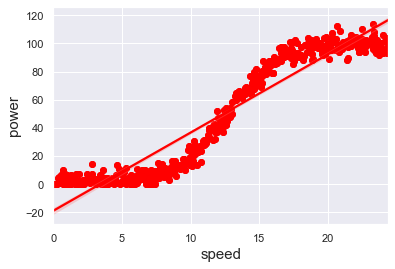

In [7]:
def regPlot(X, y):# Linear regression plot
    plt.scatter(X, y, color="red");
    plt.xlabel("Speed - ms$^{-1}$", fontsize=15) 
    plt.ylabel("Power -Watts", fontsize=15) 
    sb.regplot(x='speed',y='power',data = data, color = "red") 
   
regPlot(X, y)



In [8]:
import sklearn.linear_model as linReg

x = data["speed"].to_numpy()
y = data["power"].to_numpy()
# https://numpy.org/doc/stable/reference/generated/numpy.reshape.html
x = x.reshape(-1, 1)
model = linReg.LinearRegression()
model.fit(x, y)
regression = model.score(x, y)
print("Regression for this model is " , regression)

print("The slope and intercept of the line best fit is ", model.intercept_)
print("The coefficient of the model is ", model.coef_)

p = [model.intercept_, model.coef_]

def fill(x, p):
    return p[0] + x * p[1]

def linPredict(x):
    return fill(x,p)

# Linear Regression Predictions
print("Power: 10 Speed:", linPredict(10))
print("Power: 15 Speed:", linPredict(15))
print("Power: 20 Speed:", linPredict(20))
print("Power: 25 Speed:", linPredict(25))
print("Power: 30 Speed:", linPredict(30))



Regression for this model is  0.9025487607456801
The slope and intercept of the line best fit is  -18.87009060732686
The coefficient of the model is  [5.5509909]
Power: 10 Speed: [36.63981839]
Power: 15 Speed: [64.39477288]
Power: 20 Speed: [92.14972738]
Power: 25 Speed: [119.90468188]
Power: 30 Speed: [147.65963638]


# Training and Testing Data Sets

The train_test_split import from the sklearn.model_selection package randomly split up the data set into two
sepearte sets. One for training on, one for testing on. Since it is important to train with a good
spread of values it is better to randomly choose points for each data set. 

It's better to have a larger training set, this can be programmed with the test_size parameter. For this 
training I will be setting the test data set to be 20% of the total dataset

In [9]:
# Decision tree regression
from sklearn.model_selection import train_test_split
# Test size = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Sigmoid Activation

The activation function is treated as a middle man between the unput of the current
neuron and the output to the next one. The graph resembles a sigmoid function with a noticable "S" shaped curve.
$$ S(x) = \frac{1}{1 +e^-x} $$

Sigmoid function returns a value between 0 and 1

The data set contains 500 data points so for the first layer all of the data points will be used. Then two more dense layers containing 500 neurons each and the output layer with just 1 neuron.

In [10]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.tree import DecisionTreeRegressor
# Create layers for model
inputLayer = Input(shape=(None, 1))
denseLayer1 = Dense(500, activation='sigmoid')(inputLayer)
denseLayer2 = Dense(500, activation='sigmoid')(denseLayer1)
denseLayer3 = Dense(500, activation='sigmoid')(denseLayer2)
output = Dense(1)(denseLayer3)
model = Model(inputLayer, outputs=output)

regressor = DecisionTreeRegressor();
regressor.fit(X_train, y_train);


model = Model(inputs=inputLayer, outputs=output)
model.compile( optimizer="adam",loss="mean_squared_error",  metrics=["mean_squared_error", "mean_absolute_error"])

# https://keras.io/getting_started/intro_to_keras_for_engineers/

# Train the model for 500 epoch from Numpy data
batch_size = 64
print("Fit on NumPy data")
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=500)

# Train the model for 500 epoch using a dataset
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size)
print("Fit on Dataset")
history = model.fit(dataset, epochs=500)

Fit on NumPy data
Epoch 1/500
7/7 [==============================] - 0s 5ms/step - loss: 3633.7842 - mean_squared_error: 3633.7842 - mean_absolute_error: 45.5698
Epoch 2/500
7/7 [==============================] - 0s 6ms/step - loss: 2903.9585 - mean_squared_error: 2903.9585 - mean_absolute_error: 42.3643
Epoch 3/500
7/7 [==============================] - 0s 6ms/step - loss: 2714.3577 - mean_squared_error: 2714.3577 - mean_absolute_error: 41.8671
Epoch 4/500
7/7 [==============================] - 0s 5ms/step - loss: 2598.5537 - mean_squared_error: 2598.5537 - mean_absolute_error: 41.5823
Epoch 5/500
7/7 [==============================] - 0s 5ms/step - loss: 2496.6531 - mean_squared_error: 2496.6531 - mean_absolute_error: 41.2943
Epoch 6/500
7/7 [==============================] - 0s 5ms/step - loss: 2410.4448 - mean_squared_error: 2410.4448 - mean_absolute_error: 41.0627
Epoch 7/500
7/7 [==============================] - 0s 5ms/step - loss: 2328.3147 - mean_squared_error: 2328.3147 - mea

7/7 [==============================] - 0s 5ms/step - loss: 1752.8936 - mean_squared_error: 1752.8936 - mean_absolute_error: 39.6611
Epoch 58/500
7/7 [==============================] - 0s 5ms/step - loss: 1751.9235 - mean_squared_error: 1751.9235 - mean_absolute_error: 39.6590
Epoch 59/500
7/7 [==============================] - 0s 5ms/step - loss: 1750.0215 - mean_squared_error: 1750.0215 - mean_absolute_error: 39.6400
Epoch 60/500
7/7 [==============================] - 0s 5ms/step - loss: 1748.4319 - mean_squared_error: 1748.4319 - mean_absolute_error: 39.6204
Epoch 61/500
7/7 [==============================] - 0s 6ms/step - loss: 1747.2007 - mean_squared_error: 1747.2007 - mean_absolute_error: 39.6027
Epoch 62/500
7/7 [==============================] - 0s 6ms/step - loss: 1745.6163 - mean_squared_error: 1745.6163 - mean_absolute_error: 39.5796
Epoch 63/500
7/7 [==============================] - 0s 5ms/step - loss: 1742.8785 - mean_squared_error: 1742.8785 - mean_absolute_error: 39.540

7/7 [==============================] - 0s 6ms/step - loss: 23.3125 - mean_squared_error: 23.3125 - mean_absolute_error: 3.7505
Epoch 115/500
7/7 [==============================] - 0s 7ms/step - loss: 22.7180 - mean_squared_error: 22.7180 - mean_absolute_error: 3.7062
Epoch 116/500
7/7 [==============================] - 0s 6ms/step - loss: 21.8919 - mean_squared_error: 21.8919 - mean_absolute_error: 3.6342
Epoch 117/500
7/7 [==============================] - 0s 5ms/step - loss: 23.3837 - mean_squared_error: 23.3837 - mean_absolute_error: 3.7911
Epoch 118/500
7/7 [==============================] - 0s 5ms/step - loss: 23.9158 - mean_squared_error: 23.9158 - mean_absolute_error: 3.8849
Epoch 119/500
7/7 [==============================] - 0s 5ms/step - loss: 22.2474 - mean_squared_error: 22.2474 - mean_absolute_error: 3.7100
Epoch 120/500
7/7 [==============================] - 0s 6ms/step - loss: 20.6629 - mean_squared_error: 20.6629 - mean_absolute_error: 3.5583
Epoch 121/500
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 18.4540 - mean_squared_error: 18.4540 - mean_absolute_error: 3.3748
Epoch 173/500
7/7 [==============================] - 0s 6ms/step - loss: 17.9862 - mean_squared_error: 17.9862 - mean_absolute_error: 3.4018
Epoch 174/500
7/7 [==============================] - 0s 6ms/step - loss: 17.3546 - mean_squared_error: 17.3546 - mean_absolute_error: 3.2756
Epoch 175/500
7/7 [==============================] - 0s 6ms/step - loss: 16.9028 - mean_squared_error: 16.9028 - mean_absolute_error: 3.2809
Epoch 176/500
7/7 [==============================] - 0s 6ms/step - loss: 17.1591 - mean_squared_error: 17.1591 - mean_absolute_error: 3.2723
Epoch 177/500
7/7 [==============================] - 0s 6ms/step - loss: 17.6704 - mean_squared_error: 17.6704 - mean_absolute_error: 3.3300
Epoch 178/500
7/7 [==============================] - 0s 5ms/step - loss: 17.6492 - mean_squared_error: 17.6492 - mean_absolute_error: 3.3226
Epoch 179/500
7/7 [========

7/7 [==============================] - 0s 5ms/step - loss: 16.9221 - mean_squared_error: 16.9221 - mean_absolute_error: 3.2516
Epoch 231/500
7/7 [==============================] - 0s 5ms/step - loss: 17.6634 - mean_squared_error: 17.6634 - mean_absolute_error: 3.3295
Epoch 232/500
7/7 [==============================] - 0s 5ms/step - loss: 17.2255 - mean_squared_error: 17.2255 - mean_absolute_error: 3.2872
Epoch 233/500
7/7 [==============================] - 0s 5ms/step - loss: 16.3284 - mean_squared_error: 16.3284 - mean_absolute_error: 3.2038
Epoch 234/500
7/7 [==============================] - 0s 5ms/step - loss: 16.5714 - mean_squared_error: 16.5714 - mean_absolute_error: 3.2096
Epoch 235/500
7/7 [==============================] - 0s 5ms/step - loss: 16.7082 - mean_squared_error: 16.7082 - mean_absolute_error: 3.2910
Epoch 236/500
7/7 [==============================] - 0s 5ms/step - loss: 18.1451 - mean_squared_error: 18.1451 - mean_absolute_error: 3.3778
Epoch 237/500
7/7 [========

7/7 [==============================] - 0s 5ms/step - loss: 17.9064 - mean_squared_error: 17.9064 - mean_absolute_error: 3.3817
Epoch 289/500
7/7 [==============================] - 0s 6ms/step - loss: 16.8703 - mean_squared_error: 16.8703 - mean_absolute_error: 3.2775
Epoch 290/500
7/7 [==============================] - 0s 6ms/step - loss: 16.6085 - mean_squared_error: 16.6085 - mean_absolute_error: 3.2628
Epoch 291/500
7/7 [==============================] - 0s 5ms/step - loss: 16.6089 - mean_squared_error: 16.6089 - mean_absolute_error: 3.2574
Epoch 292/500
7/7 [==============================] - 0s 5ms/step - loss: 16.5141 - mean_squared_error: 16.5141 - mean_absolute_error: 3.2348
Epoch 293/500
7/7 [==============================] - 0s 5ms/step - loss: 17.1725 - mean_squared_error: 17.1725 - mean_absolute_error: 3.2960
Epoch 294/500
7/7 [==============================] - 0s 6ms/step - loss: 16.6715 - mean_squared_error: 16.6715 - mean_absolute_error: 3.2692
Epoch 295/500
7/7 [========

7/7 [==============================] - 0s 5ms/step - loss: 16.2268 - mean_squared_error: 16.2268 - mean_absolute_error: 3.2022
Epoch 347/500
7/7 [==============================] - 0s 5ms/step - loss: 16.8850 - mean_squared_error: 16.8850 - mean_absolute_error: 3.2477
Epoch 348/500
7/7 [==============================] - 0s 5ms/step - loss: 17.3065 - mean_squared_error: 17.3065 - mean_absolute_error: 3.2571
Epoch 349/500
7/7 [==============================] - 0s 5ms/step - loss: 17.2319 - mean_squared_error: 17.2319 - mean_absolute_error: 3.3208
Epoch 350/500
7/7 [==============================] - 0s 5ms/step - loss: 16.2250 - mean_squared_error: 16.2250 - mean_absolute_error: 3.1896
Epoch 351/500
7/7 [==============================] - 0s 6ms/step - loss: 16.6455 - mean_squared_error: 16.6455 - mean_absolute_error: 3.2319
Epoch 352/500
7/7 [==============================] - 0s 5ms/step - loss: 16.4891 - mean_squared_error: 16.4891 - mean_absolute_error: 3.2439
Epoch 353/500
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 16.7349 - mean_squared_error: 16.7349 - mean_absolute_error: 3.2389
Epoch 405/500
7/7 [==============================] - 0s 6ms/step - loss: 16.7839 - mean_squared_error: 16.7839 - mean_absolute_error: 3.2339
Epoch 406/500
7/7 [==============================] - 0s 5ms/step - loss: 17.0767 - mean_squared_error: 17.0767 - mean_absolute_error: 3.3112
Epoch 407/500
7/7 [==============================] - 0s 5ms/step - loss: 16.7816 - mean_squared_error: 16.7816 - mean_absolute_error: 3.2579
Epoch 408/500
7/7 [==============================] - 0s 5ms/step - loss: 16.3853 - mean_squared_error: 16.3853 - mean_absolute_error: 3.2161
Epoch 409/500
7/7 [==============================] - 0s 7ms/step - loss: 16.9988 - mean_squared_error: 16.9988 - mean_absolute_error: 3.2567
Epoch 410/500
7/7 [==============================] - 0s 5ms/step - loss: 16.1505 - mean_squared_error: 16.1505 - mean_absolute_error: 3.2147
Epoch 411/500
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 17.3533 - mean_squared_error: 17.3533 - mean_absolute_error: 3.3077
Epoch 463/500
7/7 [==============================] - 0s 5ms/step - loss: 17.2197 - mean_squared_error: 17.2197 - mean_absolute_error: 3.2766
Epoch 464/500
7/7 [==============================] - 0s 5ms/step - loss: 19.9076 - mean_squared_error: 19.9076 - mean_absolute_error: 3.5706
Epoch 465/500
7/7 [==============================] - 0s 5ms/step - loss: 18.7594 - mean_squared_error: 18.7594 - mean_absolute_error: 3.4128
Epoch 466/500
7/7 [==============================] - 0s 6ms/step - loss: 17.2990 - mean_squared_error: 17.2990 - mean_absolute_error: 3.2903
Epoch 467/500
7/7 [==============================] - 0s 5ms/step - loss: 17.3240 - mean_squared_error: 17.3240 - mean_absolute_error: 3.2965
Epoch 468/500
7/7 [==============================] - 0s 5ms/step - loss: 17.4897 - mean_squared_error: 17.4897 - mean_absolute_error: 3.3208
Epoch 469/500
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 16.1684 - mean_squared_error: 16.1684 - mean_absolute_error: 3.1879
Epoch 21/500
7/7 [==============================] - 0s 6ms/step - loss: 16.1709 - mean_squared_error: 16.1709 - mean_absolute_error: 3.1877
Epoch 22/500
7/7 [==============================] - 0s 5ms/step - loss: 16.1705 - mean_squared_error: 16.1705 - mean_absolute_error: 3.1878
Epoch 23/500
7/7 [==============================] - 0s 5ms/step - loss: 16.1720 - mean_squared_error: 16.1720 - mean_absolute_error: 3.1877
Epoch 24/500
7/7 [==============================] - 0s 5ms/step - loss: 16.1716 - mean_squared_error: 16.1716 - mean_absolute_error: 3.1877
Epoch 25/500
7/7 [==============================] - 0s 6ms/step - loss: 16.1726 - mean_squared_error: 16.1726 - mean_absolute_error: 3.1876
Epoch 26/500
7/7 [==============================] - 0s 7ms/step - loss: 16.1723 - mean_squared_error: 16.1723 - mean_absolute_error: 3.1877
Epoch 27/500
7/7 [===============

7/7 [==============================] - 0s 5ms/step - loss: 16.1436 - mean_squared_error: 16.1436 - mean_absolute_error: 3.1902
Epoch 79/500
7/7 [==============================] - 0s 6ms/step - loss: 16.1430 - mean_squared_error: 16.1430 - mean_absolute_error: 3.1902
Epoch 80/500
7/7 [==============================] - 0s 6ms/step - loss: 16.1424 - mean_squared_error: 16.1424 - mean_absolute_error: 3.1902
Epoch 81/500
7/7 [==============================] - 0s 5ms/step - loss: 16.1419 - mean_squared_error: 16.1419 - mean_absolute_error: 3.1902
Epoch 82/500
7/7 [==============================] - 0s 6ms/step - loss: 16.1413 - mean_squared_error: 16.1413 - mean_absolute_error: 3.1902
Epoch 83/500
7/7 [==============================] - 0s 6ms/step - loss: 16.1408 - mean_squared_error: 16.1408 - mean_absolute_error: 3.1903
Epoch 84/500
7/7 [==============================] - 0s 6ms/step - loss: 16.1402 - mean_squared_error: 16.1402 - mean_absolute_error: 3.1903
Epoch 85/500
7/7 [===============

7/7 [==============================] - 0s 5ms/step - loss: 16.1101 - mean_squared_error: 16.1101 - mean_absolute_error: 3.1890
Epoch 137/500
7/7 [==============================] - 0s 6ms/step - loss: 16.1095 - mean_squared_error: 16.1095 - mean_absolute_error: 3.1889
Epoch 138/500
7/7 [==============================] - 0s 5ms/step - loss: 16.1089 - mean_squared_error: 16.1089 - mean_absolute_error: 3.1889
Epoch 139/500
7/7 [==============================] - 0s 5ms/step - loss: 16.1084 - mean_squared_error: 16.1084 - mean_absolute_error: 3.1888
Epoch 140/500
7/7 [==============================] - 0s 5ms/step - loss: 16.1078 - mean_squared_error: 16.1078 - mean_absolute_error: 3.1888
Epoch 141/500
7/7 [==============================] - 0s 6ms/step - loss: 16.1073 - mean_squared_error: 16.1073 - mean_absolute_error: 3.1887
Epoch 142/500
7/7 [==============================] - 0s 6ms/step - loss: 16.1068 - mean_squared_error: 16.1068 - mean_absolute_error: 3.1887
Epoch 143/500
7/7 [========

7/7 [==============================] - 0s 5ms/step - loss: 16.0876 - mean_squared_error: 16.0876 - mean_absolute_error: 3.1856
Epoch 195/500
7/7 [==============================] - 0s 5ms/step - loss: 16.0873 - mean_squared_error: 16.0873 - mean_absolute_error: 3.1856
Epoch 196/500
7/7 [==============================] - 0s 5ms/step - loss: 16.0870 - mean_squared_error: 16.0870 - mean_absolute_error: 3.1855
Epoch 197/500
7/7 [==============================] - 0s 5ms/step - loss: 16.0868 - mean_squared_error: 16.0868 - mean_absolute_error: 3.1854
Epoch 198/500
7/7 [==============================] - 0s 5ms/step - loss: 16.0865 - mean_squared_error: 16.0865 - mean_absolute_error: 3.1853
Epoch 199/500
7/7 [==============================] - 0s 5ms/step - loss: 16.0862 - mean_squared_error: 16.0862 - mean_absolute_error: 3.1853
Epoch 200/500
7/7 [==============================] - 0s 6ms/step - loss: 16.0859 - mean_squared_error: 16.0859 - mean_absolute_error: 3.1852
Epoch 201/500
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 16.0715 - mean_squared_error: 16.0715 - mean_absolute_error: 3.1805
Epoch 253/500
7/7 [==============================] - 0s 6ms/step - loss: 16.0713 - mean_squared_error: 16.0713 - mean_absolute_error: 3.1804
Epoch 254/500
7/7 [==============================] - 0s 6ms/step - loss: 16.0711 - mean_squared_error: 16.0711 - mean_absolute_error: 3.1803
Epoch 255/500
7/7 [==============================] - 0s 6ms/step - loss: 16.0709 - mean_squared_error: 16.0709 - mean_absolute_error: 3.1802
Epoch 256/500
7/7 [==============================] - 0s 6ms/step - loss: 16.0707 - mean_squared_error: 16.0707 - mean_absolute_error: 3.1801
Epoch 257/500
7/7 [==============================] - 0s 5ms/step - loss: 16.0705 - mean_squared_error: 16.0705 - mean_absolute_error: 3.1801
Epoch 258/500
7/7 [==============================] - 0s 5ms/step - loss: 16.0703 - mean_squared_error: 16.0703 - mean_absolute_error: 3.1800
Epoch 259/500
7/7 [========

7/7 [==============================] - 0s 7ms/step - loss: 16.0617 - mean_squared_error: 16.0617 - mean_absolute_error: 3.1754
Epoch 310/500
7/7 [==============================] - 0s 7ms/step - loss: 16.0616 - mean_squared_error: 16.0616 - mean_absolute_error: 3.1754
Epoch 311/500
7/7 [==============================] - 0s 6ms/step - loss: 16.0614 - mean_squared_error: 16.0614 - mean_absolute_error: 3.1753
Epoch 312/500
7/7 [==============================] - 0s 6ms/step - loss: 16.0613 - mean_squared_error: 16.0613 - mean_absolute_error: 3.1752
Epoch 313/500
7/7 [==============================] - 0s 7ms/step - loss: 16.0611 - mean_squared_error: 16.0611 - mean_absolute_error: 3.1751
Epoch 314/500
7/7 [==============================] - 0s 8ms/step - loss: 16.0610 - mean_squared_error: 16.0610 - mean_absolute_error: 3.1750
Epoch 315/500
7/7 [==============================] - 0s 8ms/step - loss: 16.0608 - mean_squared_error: 16.0608 - mean_absolute_error: 3.1749
Epoch 316/500
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 16.0526 - mean_squared_error: 16.0526 - mean_absolute_error: 3.1706
Epoch 368/500
7/7 [==============================] - 0s 8ms/step - loss: 16.0525 - mean_squared_error: 16.0525 - mean_absolute_error: 3.1706
Epoch 369/500
7/7 [==============================] - 0s 6ms/step - loss: 16.0523 - mean_squared_error: 16.0523 - mean_absolute_error: 3.1705
Epoch 370/500
7/7 [==============================] - 0s 7ms/step - loss: 16.0522 - mean_squared_error: 16.0522 - mean_absolute_error: 3.1704
Epoch 371/500
7/7 [==============================] - 0s 7ms/step - loss: 16.0520 - mean_squared_error: 16.0520 - mean_absolute_error: 3.1703
Epoch 372/500
7/7 [==============================] - 0s 7ms/step - loss: 16.0518 - mean_squared_error: 16.0518 - mean_absolute_error: 3.1703
Epoch 373/500
7/7 [==============================] - 0s 7ms/step - loss: 16.0517 - mean_squared_error: 16.0517 - mean_absolute_error: 3.1702
Epoch 374/500
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 16.0407 - mean_squared_error: 16.0407 - mean_absolute_error: 3.1659
Epoch 426/500
7/7 [==============================] - 0s 6ms/step - loss: 16.0405 - mean_squared_error: 16.0405 - mean_absolute_error: 3.1658
Epoch 427/500
7/7 [==============================] - 0s 6ms/step - loss: 16.0402 - mean_squared_error: 16.0402 - mean_absolute_error: 3.1657
Epoch 428/500
7/7 [==============================] - 0s 6ms/step - loss: 16.0400 - mean_squared_error: 16.0400 - mean_absolute_error: 3.1657
Epoch 429/500
7/7 [==============================] - 0s 6ms/step - loss: 16.0397 - mean_squared_error: 16.0397 - mean_absolute_error: 3.1656
Epoch 430/500
7/7 [==============================] - 0s 6ms/step - loss: 16.0395 - mean_squared_error: 16.0395 - mean_absolute_error: 3.1656
Epoch 431/500
7/7 [==============================] - 0s 6ms/step - loss: 16.0392 - mean_squared_error: 16.0392 - mean_absolute_error: 3.1655
Epoch 432/500
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 16.0253 - mean_squared_error: 16.0253 - mean_absolute_error: 3.1627
Epoch 484/500
7/7 [==============================] - 0s 7ms/step - loss: 16.0250 - mean_squared_error: 16.0250 - mean_absolute_error: 3.1626
Epoch 485/500
7/7 [==============================] - 0s 6ms/step - loss: 16.0247 - mean_squared_error: 16.0247 - mean_absolute_error: 3.1626
Epoch 486/500
7/7 [==============================] - 0s 5ms/step - loss: 16.0245 - mean_squared_error: 16.0245 - mean_absolute_error: 3.1626
Epoch 487/500
7/7 [==============================] - 0s 5ms/step - loss: 16.0242 - mean_squared_error: 16.0242 - mean_absolute_error: 3.1625
Epoch 488/500
7/7 [==============================] - 0s 5ms/step - loss: 16.0239 - mean_squared_error: 16.0239 - mean_absolute_error: 3.1625
Epoch 489/500
7/7 [==============================] - 0s 6ms/step - loss: 16.0236 - mean_squared_error: 16.0236 - mean_absolute_error: 3.1624
Epoch 490/500
7/7 [========